## How to do it

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

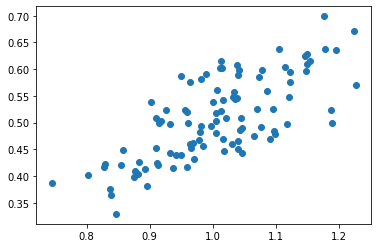

In [5]:
np.random.seed(0)
x_vals = np.random.normal(1, 0.1, 100).astype(np.float32)
y_vals = (x_vals * (np.random.normal(1, 0.05, 100) - 0.5)).astype(np.float32)

plt.scatter(x_vals, y_vals)
plt.show()

In [6]:
def my_output(X, weights, biases):
    return tf.add(tf.multiply(X, weights), biases)

In [12]:
def loss_func(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [13]:
my_opt = tf.optimizers.SGD(learning_rate=0.02)

In [14]:
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape=[1]))
biases = tf.Variable(tf.random.normal(shape=[1]))
history = list()

In [16]:
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    with tf.GradientTape() as tape:
        predictions = my_output(rand_x, weights, biases)
        loss = loss_func(rand_y, predictions)
    history.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if (i + 1) % 25 == 0:
        print(f'Step # {i + 1} Weights: {weights.numpy()} Biases: {biases.numpy()}')
        print(f'Loss = {loss.numpy()}')

Step # 25 Weights: [-0.5724959] Biases: [0.91629505]
Loss = 0.09151718020439148
Step # 50 Weights: [-0.5048501] Biases: [0.9786189]
Loss = 0.00013714825036004186
Step # 75 Weights: [-0.4651749] Biases: [1.0034196]
Loss = 0.07202579826116562
Step # 100 Weights: [-0.47813603] Biases: [0.97745514]
Loss = 0.002147938823327422


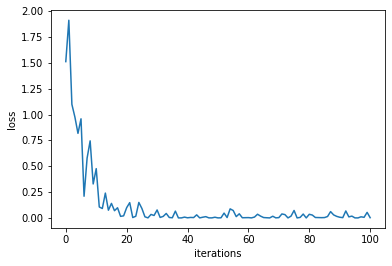

In [17]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

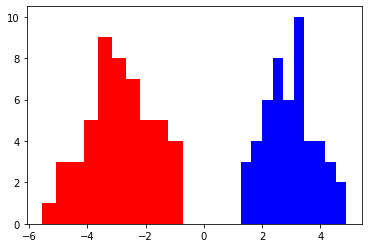

In [18]:
np.random.seed(0)
x_vals = np.concatenate((np.random.normal(-3, 1, 50),
                        np.random.normal(3, 1, 50))
                       ).astype(np.float32)
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50))).astype(np.float32)

plt.hist(x_vals[y_vals==1], color='b')
plt.hist(x_vals[y_vals==0], color='r')
plt.show()

In [19]:
def loss_func(y_true, y_pred):
    return tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,
                                                logits=y_pred))

In [20]:
tf. random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape=[1]))
biases = tf.Variable(tf.random.normal(shape=[1]))
history = list()

In [21]:
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    with tf.GradientTape() as tape:
        predictions = my_output(rand_x, weights, biases)
        loss = loss_func(rand_y, predictions)
    history.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if (i + 1) % 25 == 0:
        print(f'Step # {i + 1} Weights: {weights.numpy()} Biases: {biases.numpy()}')
        print(f'Loss = {loss.numpy()}')

Step # 25 Weights: [-0.01804189] Biases: [0.44081178]
Loss = 0.5967270135879517
Step # 50 Weights: [0.49321094] Biases: [0.3773208]
Loss = 0.3199256956577301
Step # 75 Weights: [0.7071932] Biases: [0.32154968]
Loss = 0.03642747551202774
Step # 100 Weights: [0.8395616] Biases: [0.30409008]
Loss = 0.028119442984461784


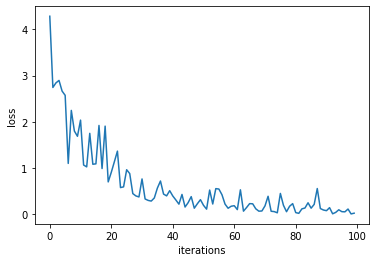

In [22]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()